# **MinMax Scaler**

In [7]:
import numpy as np
feature = np.array([10, 100, 50])

def minmax(X, min_val=0, max_val=1):
  X_std = (X - X.min()) / (X.max() - X.min())
  X_scaled = X_std * (max_val - min_val) + min_val
  return X_scaled

print(minmax(feature))

[-1.          1.         -0.11111111]


In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.3, random_state=42)

print(x_train.shape)
print(x_test.shape)

(398, 30)
(171, 30)


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
scaler.fit(x_train)

MinMaxScaler()

In [12]:
x_train_scaled = scaler.transform(x_train)

print(f'Valor mínimo (Não escalado): {x_train.min()}')
print(f'Valor mínimo (Escalado): {x_train_scaled.min()}')
print(f'Valor máximo (Não escalado): {x_train.max()}')
print(f'Valor máximo (Escalado): {x_train_scaled.max()}')

Valor mínimo (Não escalado): 0.0
Valor mínimo (Escalado): 0.0
Valor máximo (Não escalado): 4254.0
Valor máximo (Escalado): 1.0000000000000002


In [13]:
print(f'Valor mínimo (Não escalado): {x_train.min(axis=0)}')
print(f'Valor mínimo (Escalado): {x_train_scaled.min(axis=0)}')
print(f'Valor máximo (Não escalado): {x_train.max(axis=0)}')
print(f'Valor máximo (Escalado): {x_train_scaled.max(axis=0)}')

Valor mínimo (Não escalado): [7.691e+00 9.710e+00 4.834e+01 1.704e+02 6.251e-02 1.938e-02 0.000e+00
 0.000e+00 1.167e-01 4.996e-02 1.115e-01 3.602e-01 7.570e-01 6.802e+00
 2.667e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 8.678e+00
 1.202e+01 5.449e+01 2.236e+02 8.125e-02 3.432e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
Valor mínimo (Escalado): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Valor máximo (Não escalado): [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 3.647e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.184e-01 9.379e-01 9.034e-01 2.756e-01
 6.638e-01 1.730e-01]
Valor máximo (Escalado): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [14]:
x_test_scaled = scaler.transform(x_test)

print(f'Valor mínimo (Não escalado): {x_test.min()}')
print(f'Valor mínimo (Escalado): {x_test_scaled.min()}')
print(f'Valor máximo (Não escalado): {x_test.max()}')
print(f'Valor máximo (Escalado): {x_test_scaled.max()}')

Valor mínimo (Não escalado): 0.0
Valor mínimo (Escalado): -0.09792843691148767
Valor máximo (Não escalado): 3432.0
Valor máximo (Escalado): 1.3858755811379235


# **Standard Scaler**

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

print(f'Valor mínimo (Não escalado): {x_train.min()}')
print(f'Valor mínimo (Escalado): {x_train_scaled.min()}')
print(f'Valor máximo (Não escalado): {x_train.max()}')
print(f'Valor máximo (Escalado): {x_train_scaled.max()}')

Valor mínimo (Não escalado): 0.0
Valor mínimo (Escalado): -2.4330506045979603
Valor máximo (Não escalado): 4254.0
Valor máximo (Escalado): 12.117676354989804


# **Function Transform**

In [17]:
import pandas as pd
dataset = {"Imposto": [1000, 1500, 800, 2200, 2700, 2900], "Sexo": ["Masculino", "Feminimo", "Masculino", "Feminimo", "Masculino", "Feminimo"]}
dataset = pd.DataFrame(dataset)
dataset

,Imposto,Sexo
0,1000,Masculino
1,1500,Feminimo
2,800,Masculino
3,2200,Feminimo
4,2700,Masculino
5,2900,Feminimo


In [18]:
def str_to_char(df):
  return df.apply(lambda x: x.str.slice(0, 1))

In [36]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer

clip = FunctionTransformer(np.clip, kw_args={'a_min': 1, 'a_max': 2000})
gen_char = FunctionTransformer(str_to_char)

transform = make_column_transformer((clip, ["Imposto"]),
                                    (gen_char, ["Sexo"]))

In [37]:
transform.fit_transform(dataset)

array([[1000, 'M'],
       [1500, 'F'],
       [800, 'M'],
       [2000, 'F'],
       [2000, 'M'],
       [2000, 'F']], dtype=object)

(array([809., 148.,  28.,   7.,   3.,   2.,   1.,   0.,   0.,   2.]),
 array([   1.74131156,  132.99292175,  264.24453194,  395.49614214,
         526.74775233,  657.99936252,  789.25097272,  920.50258291,
        1051.7541931 , 1183.0058033 , 1314.25741349]),
 <BarContainer object of 10 artists>)

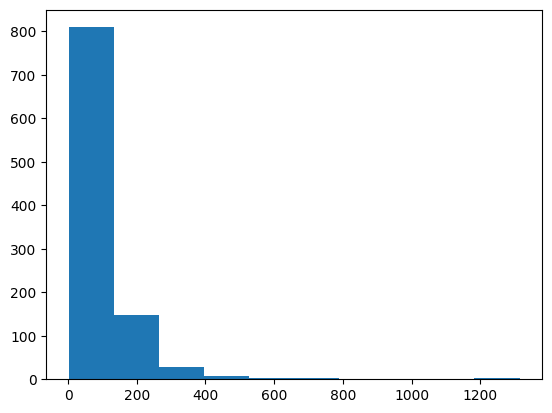

In [22]:
import matplotlib.pyplot as plt

avg, std = 4., 1.

logn = np.random.lognormal(avg, std, 1000)

plt.hist(logn)

In [26]:
yj, bc = [], []
l = -.01

for x_i in logn:
  yj.append((((x_i + 1) ** l) - 1) / l)
  bc.append(((x_i**l) - 1) / l)

(array([  7.,  27.,  81., 135., 259., 238., 170.,  64.,  14.,   5.]),
 array([1.0033688 , 1.5960281 , 2.18868739, 2.78134669, 3.37400598,
        3.96666528, 4.55932457, 5.15198386, 5.74464316, 6.33730245,
        6.92996175]),
 <BarContainer object of 10 artists>)

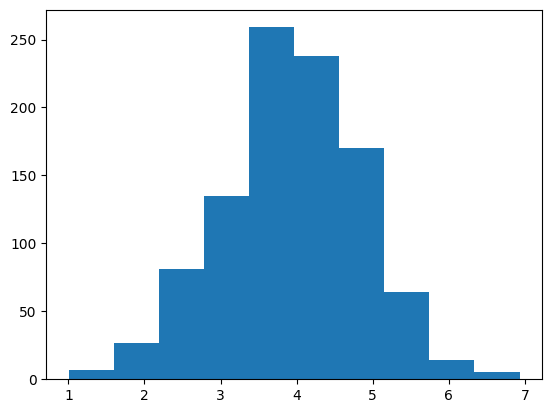

In [27]:
plt.hist(yj)

(array([  2.,  20.,  55., 118., 217., 273., 194.,  96.,  20.,   5.]),
 array([0.55310332, 1.19071837, 1.82833342, 2.46594848, 3.10356353,
        3.74117859, 4.37879364, 5.01640869, 5.65402375, 6.2916388 ,
        6.92925386]),
 <BarContainer object of 10 artists>)

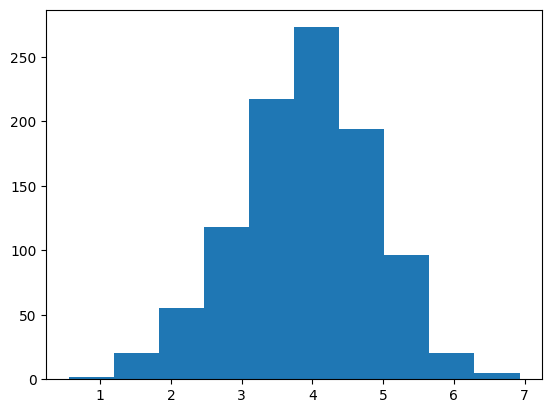

In [28]:
plt.hist(bc)

In [30]:
from sklearn.preprocessing import PowerTransformer

trans_yj = PowerTransformer(method="yeo-johnson")
trans_bc = PowerTransformer(method="box-cox")

logn = logn.reshape(-1, 1)

yj_data = trans_yj.fit_transform(logn)
bc_data = trans_bc.fit_transform(logn)

(array([  9.,  38., 106., 173., 261., 214., 140.,  46.,  10.,   3.]),
 array([-2.99959965, -2.35473228, -1.70986492, -1.06499756, -0.42013019,
         0.22473717,  0.86960453,  1.5144719 ,  2.15933926,  2.80420663,
         3.44907399]),
 <BarContainer object of 10 artists>)

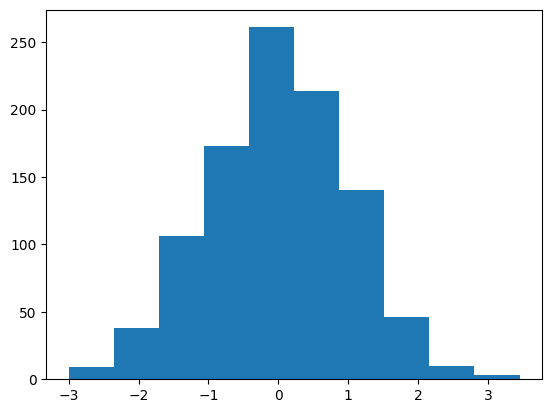

In [31]:
plt.hist(yj_data)

(array([  7.,  30.,  94., 166., 275., 227., 142.,  46.,  10.,   3.]),
 array([-3.17142053, -2.50249554, -1.83357056, -1.16464557, -0.49572058,
         0.1732044 ,  0.84212939,  1.51105438,  2.17997936,  2.84890435,
         3.51782934]),
 <BarContainer object of 10 artists>)

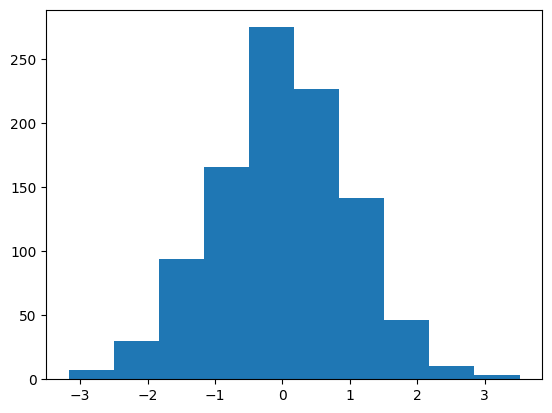

In [32]:
plt.hist(bc_data)

In [33]:
print(trans_yj.lambdas_)
print(trans_bc.lambdas_)

[0.03296]
[0.05925548]
